In [1]:
url = "https://gist.githubusercontent.com/ryanorsinger/6218f5731f3df7cb4771ff3879fdeaa3/raw/88cb6bed276e2236c33df011bd753b6c73832c30/quartet.csv"

In [2]:
# pandas and numpy for tabular data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Examining continuous anomalies:
 - Tactics:
 - Visualization
 - Basic Descriptive Analysis
 - Tukey Method/IQR based analysis
 - Z-score based analysis

In [3]:
# let's grab this dataset described in the url
df = pd.read_csv(url)

In [4]:
df.head()

,id,dataset,x,y
0,0,I,10.0,8.04
1,1,I,8.0,6.95
2,2,I,13.0,7.58
3,3,I,9.0,8.81
4,4,I,11.0,8.33


In [5]:
df.groupby('dataset').describe().T

dataset           I         II        III         IV
id count  11.000000  11.000000  11.000000  11.000000
   mean    5.000000  16.000000  27.000000  38.000000
   std     3.316625   3.316625   3.316625   3.316625
   min     0.000000  11.000000  22.000000  33.000000
   25%     2.500000  13.500000  24.500000  35.500000
   50%     5.000000  16.000000  27.000000  38.000000
   75%     7.500000  18.500000  29.500000  40.500000
   max    10.000000  21.000000  32.000000  43.000000
x  count  11.000000  11.000000  11.000000  11.000000
   mean    9.000000   9.000000   9.000000   9.000000
   std     3.316625   3.316625   3.316625   3.316625
   min     4.000000   4.000000   4.000000   8.000000
   25%     6.500000   6.500000   6.500000   8.000000
   50%     9.000000   9.000000   9.000000   8.000000
   75%    11.500000  11.500000  11.500000   8.000000
   max    14.000000  14.000000  14.000000  19.000000
y  count  11.000000  11.000000  11.000000  11.000000
   mean    7.500909   7.500909   7.500000   7.500909
   std     2.031568   2.031657   2.030424   2.030579
   min     4.260000   3.100000   5.390000   5.250000
   25%     6.315000   6.695000   6.250000   6.170000
   50%     7.580000   8.140000   7.110000   7.040000
   75%     8.570000   8.950000   7.980000   8.190000
   max    10.840000   9.260000  12.740000  12.500000

In [6]:
import seaborn as sns

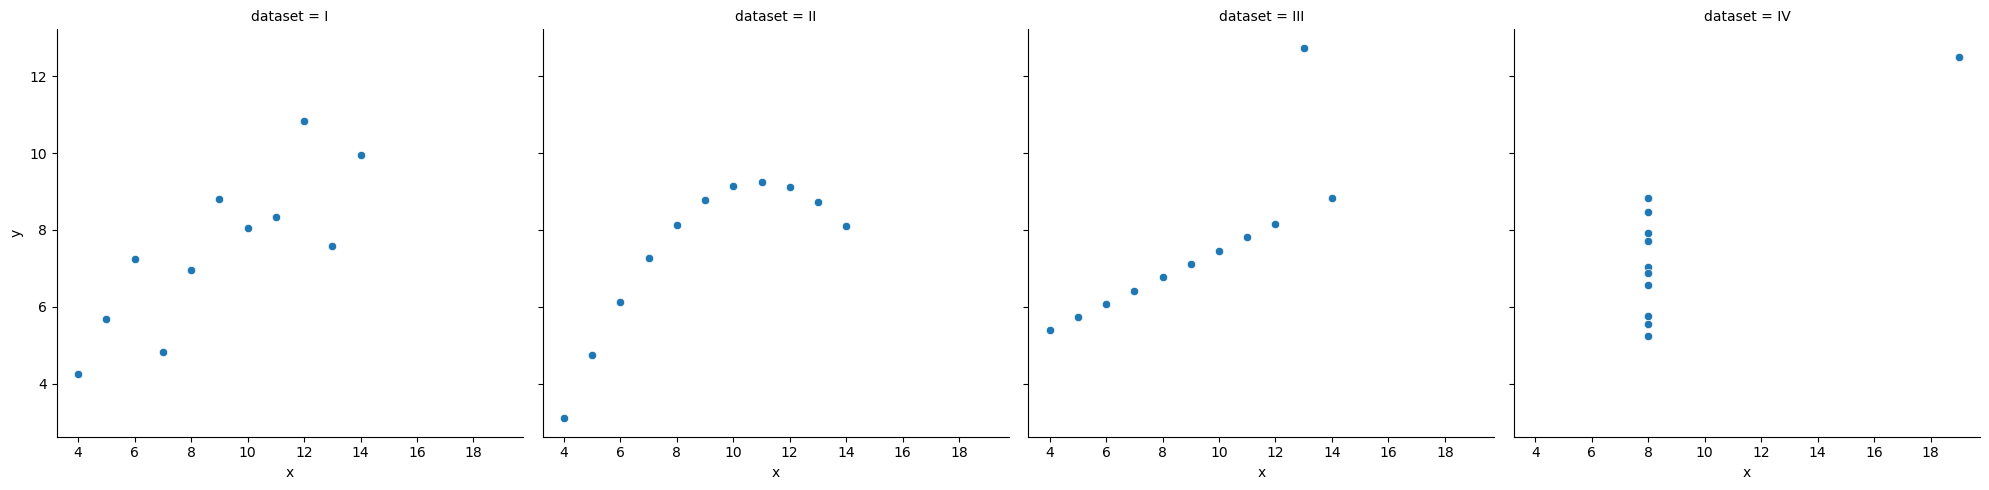

In [7]:
sns.relplot(data = df,
            x='x',
            y='y',
            col='dataset')

 Ascombe's quartet is a good reminder that we really need to apply both numerical and visual analysis to our data before we dive deeper and ask deeper questions.  Please keep in mind as we proceed forward :)

In [8]:
df

,id,dataset,x,y
0,0,I,10.0,8.04
1,1,I,8.0,6.95
2,2,I,13.0,7.58
3,3,I,9.0,8.81
4,4,I,11.0,8.33
5,5,I,14.0,9.96
6,6,I,6.0,7.24
7,7,I,4.0,4.26
8,8,I,12.0,10.84
9,9,I,7.0,4.82


### Defining separate tactics:
 - Z score vs IQR/Tukey Method:

Z score is a little more regimented to normal data.
 - The presumptions of a z score presume that the underlying data is indeed normal. That the standard deviation has meaning based on the curvature of the normal distributive function
IQR / Tukey Method:
 - A little more flexible, this is imbued with the idea that we can divide any data set into anticipated quartiles with the understanding that with the range of Q3 - Q1 representing our inner quartile range, that a multiplication of said IQR will be a good assessment for what describes something "off" or "weird"

In [10]:
from pydataset import data

initiated datasets repo at: /Users/madeleinecapper/.pydataset/


In [12]:
df = data('swiss')

In [14]:
df.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [15]:
# Swiss dataset has a bunch of stats based on regions
# All of this info is continuous, so let's examine those two tactics

In [16]:
# Method 1: IQR

In [17]:
df.describe()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
count,47.000000,47.000000,47.000000,47.000000,47.00000,47.000000
mean,70.142553,50.659574,16.489362,10.978723,41.14383,19.942553
std,12.491697,22.711218,7.977883,9.615407,41.70485,2.912697
min,35.000000,1.200000,3.000000,1.000000,2.15000,10.800000
25%,64.700000,35.900000,12.000000,6.000000,5.19500,18.150000
50%,70.400000,54.100000,16.000000,8.000000,15.14000,20.000000
75%,78.450000,67.650000,22.000000,12.000000,93.12500,21.700000
max,92.500000,89.700000,37.000000,53.000000,100.00000,26.600000


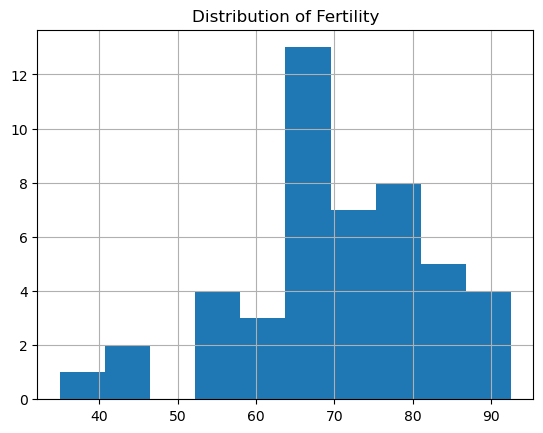

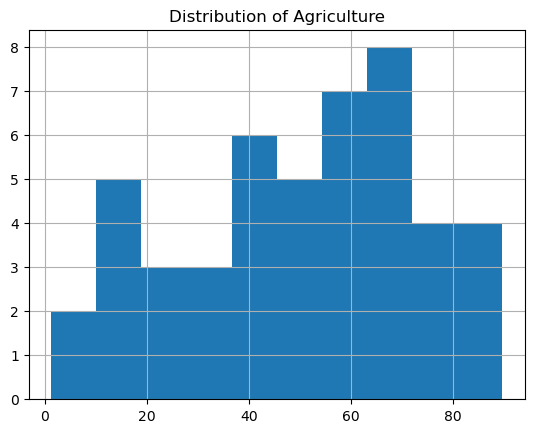

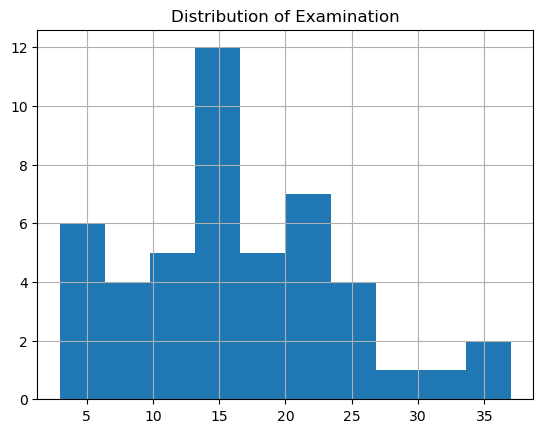

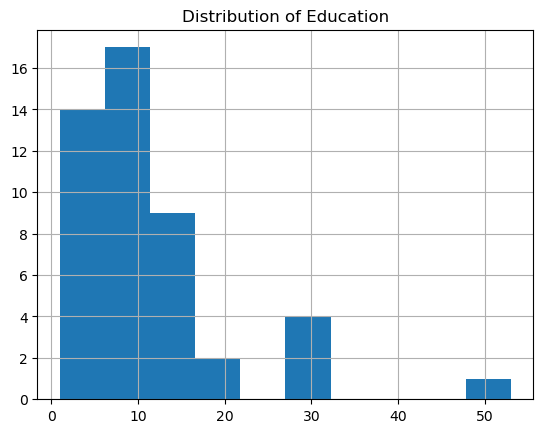

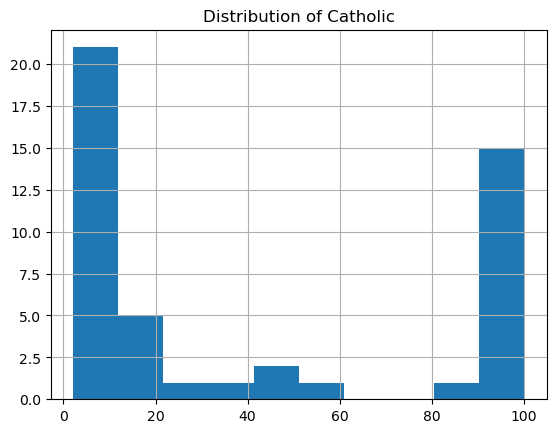

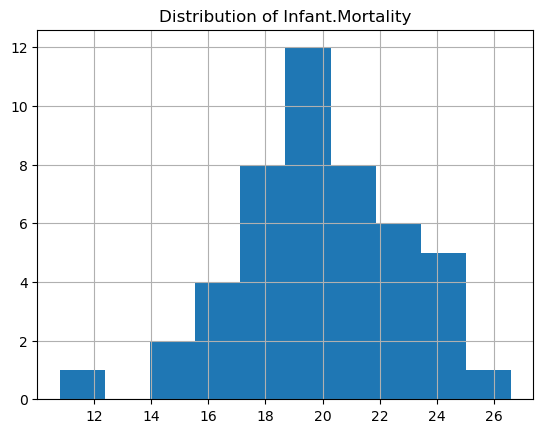

In [19]:
# brief visual analysis:
for col in df:
    df[col].hist()
    plt.title(f'Distribution of {col}')
    plt.show()

In [20]:
# Doing the tukey thing:
# step 1: calculate IQR
# IQR is Q3 - Q1

In [21]:
df.describe()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
count,47.000000,47.000000,47.000000,47.000000,47.00000,47.000000
mean,70.142553,50.659574,16.489362,10.978723,41.14383,19.942553
std,12.491697,22.711218,7.977883,9.615407,41.70485,2.912697
min,35.000000,1.200000,3.000000,1.000000,2.15000,10.800000
25%,64.700000,35.900000,12.000000,6.000000,5.19500,18.150000
50%,70.400000,54.100000,16.000000,8.000000,15.14000,20.000000
75%,78.450000,67.650000,22.000000,12.000000,93.12500,21.700000
max,92.500000,89.700000,37.000000,53.000000,100.00000,26.600000


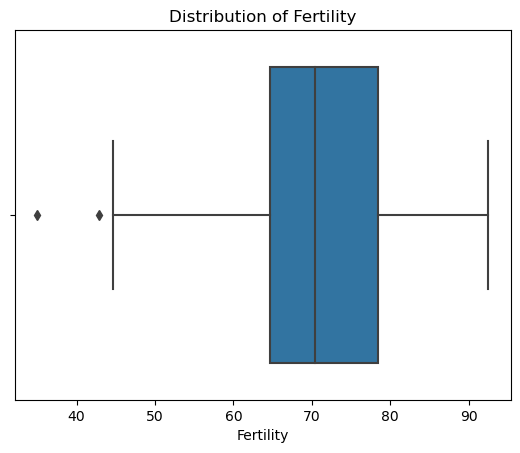

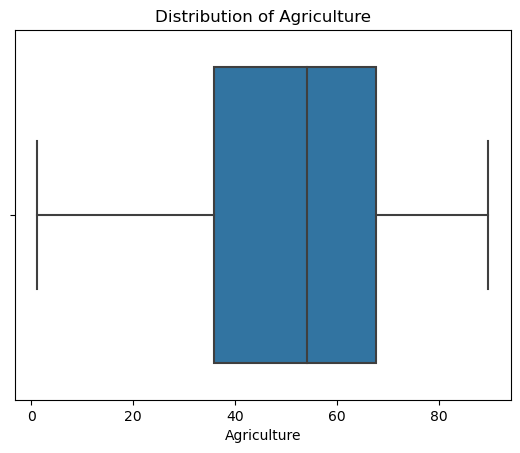

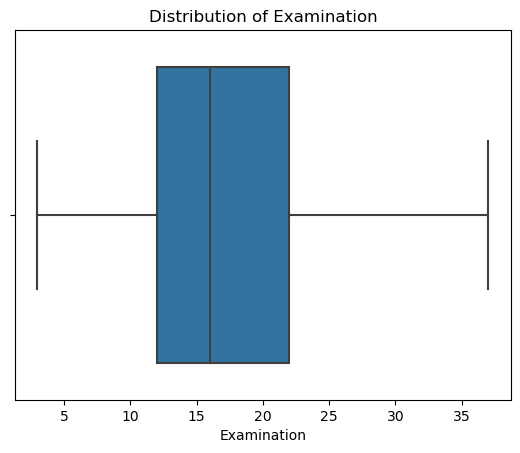

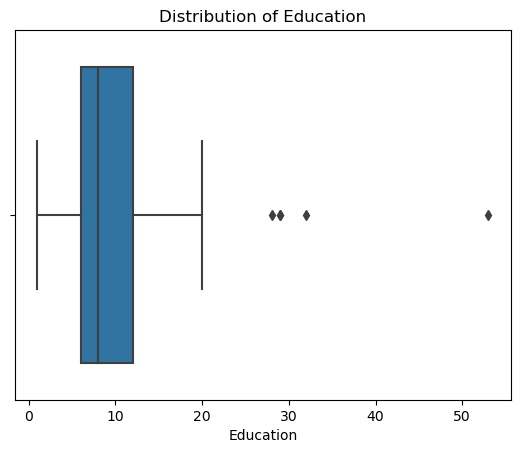

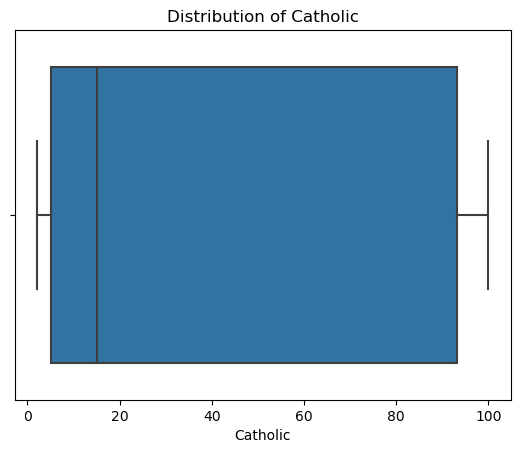

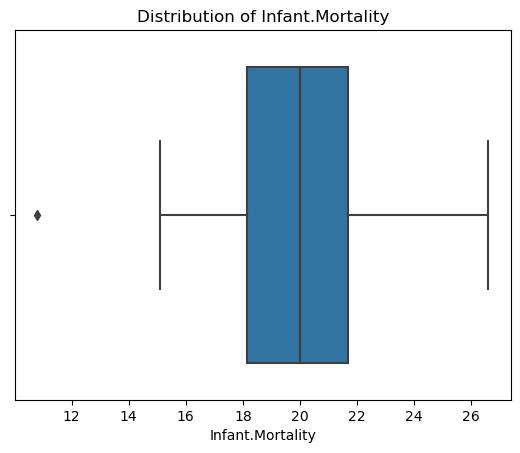

In [22]:
for col in df:
    sns.boxplot(data=df, x = col)
    plt.title(f'Distribution of {col}')
    plt.show()

In [23]:
# for any given series:

In [1]:
# lower case and underscores for everyone:
df.columns = [col.lower().replace('.','_') for col in df.columns]

NameError: name 'df' is not defined

In [ ]:
# Two ways to look at quartiles
# one is from quantile method

In [35]:
q1 = df.fertility.quantile(.25)
q1

64.7

In [30]:
df.fertility.quantile(.75)

78.44999999999999

In [36]:
# we could also get it from describe
q3 = df.fertility.describe()['75%']
q3

78.44999999999999

In [33]:
# calculate IQR:
df.fertility.quantile(.75) - df.fertility.quantile(.25)

13.749999999999986

In [37]:
k_times_iqr = 1.5 * (df.fertility.quantile(.75) - df.fertility.quantile(.25))

In [38]:
lower_fence = q1 - k_times_iqr
upper_fence = q3 + k_times_iqr

In [39]:
lower_fence

44.075000000000024

In [40]:
upper_fence

99.07499999999996

In [41]:
# say I want to do this programmatically:
# I do. I do want that. Let's do that.
def get_fences(df, col, k=1.5):
    '''
    get_fences takes in a dataframe and a string literal
    df, a pandas dataframe
    k, an integer representing the fence for our method
    col, a string literal represening a column name
    returns the lower and upper fences of a series
    '''
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)
    iqr = q3 - q1
    lower_fence = q1 - iqr*k
    upper_fence = q3 + iqr*k
    return lower_fence, upper_fence

In [42]:
get_fences(df,'fertility')

(44.075000000000024, 99.07499999999996)

In [57]:
my_fences = {}
for col in df.columns:
    my_fences[col] = get_fences(df,col,k=3)

In [58]:
my_fences

{'fertility': (23.450000000000045, 119.69999999999995),
 'agriculture': (-59.35000000000003, 162.90000000000003),
 'examination': (-18.0, 52.0),
 'education': (-12.0, 30.0),
 'catholic': (-258.595, 356.915),
 'infant_mortality': (7.4999999999999964, 32.35)}

In [47]:
my_fences['examination'][0]

-3.0

In [56]:
# df['examination'] < my_fences['examination'][0]

In [52]:
# the dataframe, for any instance in examination
# that is below my lower fence or above my upper fence
df[
    (df['examination'] < my_fences['examination'][0]) \
    | (df['examination'] > my_fences['examination'][1])]

,fertility,agriculture,examination,education,catholic,infant_mortality


In [59]:
for col in df:
    print(f'For feature {col}')
    print(df[
    (df[col] < my_fences[col][0]) \
    | (df[col] > my_fences[col][1])])
    print('========================')

For feature fertility
Empty DataFrame
Columns: [fertility, agriculture, examination, education, catholic, infant_mortality]
Index: []
For feature agriculture
Empty DataFrame
Columns: [fertility, agriculture, examination, education, catholic, infant_mortality]
Index: []
For feature examination
Empty DataFrame
Columns: [fertility, agriculture, examination, education, catholic, infant_mortality]
Index: []
For feature education
              fertility  agriculture  examination  education  catholic   
Neuchatel          64.4         17.6           35         32     16.92  \
V. De Geneve       35.0          1.2           37         53     42.34   

              infant_mortality  
Neuchatel                 23.0  
V. De Geneve              18.0  
For feature catholic
Empty DataFrame
Columns: [fertility, agriculture, examination, education, catholic, infant_mortality]
Index: []
For feature infant_mortality
Empty DataFrame
Columns: [fertility, agriculture, examination, education, catholic, infa

In [60]:
# what about those z-scores:
# z score calculated similarly, but our fencing is determined by 
# number of standard deviatons out

In [70]:
# z scores for examination:
# each data point subtracted by the mean of examination
# divided by the standard deviation
df[(((
    df['examination'] - df['examination'].mean()
)/ df.examination.std()) > 3) | (((
    df['examination'] - df['examination'].mean()
)/ df.examination.std()) < -3)]


,fertility,agriculture,examination,education,catholic,infant_mortality


In [72]:
# getting z for multiple columns
for col in df.columns:
    print(f' For Column {col}')
    print(df[(((
    df[col] - df[col].mean()
)/ df[col].std()) > 3) | (((
    df[col] - df[col].mean()
)/ df[col].std()) < -3)].T)
    print('=============')

 For Column fertility
Empty DataFrame
Columns: []
Index: [fertility, agriculture, examination, education, catholic, infant_mortality]
 For Column agriculture
Empty DataFrame
Columns: []
Index: [fertility, agriculture, examination, education, catholic, infant_mortality]
 For Column examination
Empty DataFrame
Columns: []
Index: [fertility, agriculture, examination, education, catholic, infant_mortality]
 For Column education
                  V. De Geneve
fertility                35.00
agriculture               1.20
examination              37.00
education                53.00
catholic                 42.34
infant_mortality         18.00
 For Column catholic
Empty DataFrame
Columns: []
Index: [fertility, agriculture, examination, education, catholic, infant_mortality]
 For Column infant_mortality
                  La Vallee
fertility             54.30
agriculture           15.20
examination           31.00
education             20.00
catholic               2.15
infant_mortality      10.

In [73]:
df.education.describe()

count    47.000000
mean     10.978723
std       9.615407
min       1.000000
25%       6.000000
50%       8.000000
75%      12.000000
max      53.000000
Name: education, dtype: float64